In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sns
from scipy.stats import kurtosis

https://drive.google.com/file/d/11BKUvXC_tInntNtDrb50DOoIi88FzDcM/view?usp=sharing

In [ ]:
df = pd.read_csv('/content/avocado_prices.csv')

In [ ]:
print(df.columns)
print(df.dtypes)
print(df.type.value_counts())
print(df.shape)
print(df.info)
print(df.describe())

Index(['date', 'region', 'type', 'averageprice', 'total_bags', 'small_bags',
       'large_bags', 'xlarge_bags'],
      dtype='object')
date             object
region           object
type             object
averageprice    float64
total_bags      float64
small_bags      float64
large_bags      float64
xlarge_bags     float64
dtype: object
conventional    648
organic         648
Name: type, dtype: int64
(1296, 8)
<bound method DataFrame.info of             date            region  ... large_bags  xlarge_bags
0     2018-03-25            Albany  ...    4270.53       380.00
1     2018-03-18            Albany  ...    3721.31       500.00
2     2018-03-11            Albany  ...    3033.09       291.11
3     2018-03-04            Albany  ...    5941.45       283.33
4     2018-02-25            Albany  ...    3702.49       310.00
...          ...               ...  ...        ...          ...
1291  2018-02-04  WestTexNewMexico  ...     431.85         0.00
1292  2018-01-28  WestTexNewMexico  ...

In [ ]:
df.sample(4)

,date,region,type,averageprice,total_bags,small_bags,large_bags,xlarge_bags
134,2018-03-11,DallasFtWorth,conventional,0.87,448420.94,329344.14,100310.59,18766.21
235,2018-02-04,Indianapolis,conventional,0.79,123090.81,95765.52,25974.12,1351.17
415,2018-02-04,Pittsburgh,conventional,0.98,91263.98,38743.07,52514.24,6.67
1205,2018-02-18,Southeast,organic,1.50,81771.29,70925.90,10845.39,0.00


**Задание 1** Проверьте данные на наличие пропусков и некорректных значений. Всегда ли total_bags равен сумме всех типов упаковки?

In [ ]:
df.isna().sum() # проверка на наличие пропусков, их нет

date            0
region          0
type            0
averageprice    0
total_bags      0
small_bags      0
large_bags      0
xlarge_bags     0
dtype: int64

In [ ]:
df['Сравнение'] = df.small_bags + df.large_bags + df.xlarge_bags - df.total_bags # создаем столбец в котором будет результат операций
df['Сравнение'].value_counts().reset_index() # считаем количество несоответствий

,index,Сравнение
0,0.000000e+00,988
1,1.455192e-11,35
2,-2.910383e-11,33
3,-1.455192e-11,24
4,2.910383e-11,23
5,3.637979e-12,19
6,-1.818989e-12,17
7,9.094947e-13,17
8,-3.637979e-12,16
9,-9.094947e-13,15


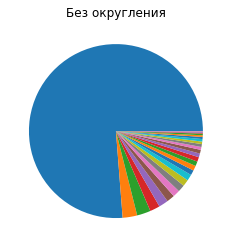

In [ ]:
lst2 = list(df['Сравнение'].value_counts().reset_index()['Сравнение'])
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Без округления')
plt.pie(lst2)
plt.show()

In [ ]:
print(df[df['Сравнение'] != 0]['Сравнение'].count()) # количество строк с погрешностью
proc = int(np.around(df[df['Сравнение'] != 0]['Сравнение'].count()*100/df['Сравнение'].count()))
print(f'{proc}% данных полуучились с какой-то набегающей погрешность')

308
24% данных полуучились с какой-то набегающей погрешность


In [ ]:
round(df['Сравнение'],4).value_counts().reset_index() # если округлить до четвертого знака(к примеру), зеачит, если пренебречь какой-то
                                                      # погрешностью, то данные будут сходиться, причем все


,index,Сравнение
0,-0.0,1296


In [ ]:
np.allclose(df.small_bags + df.large_bags + df.xlarge_bags, df.total_bags)

True

In [ ]:
del df['Сравнение']
#df.head(3)

**Задание 2** Как можно разметить признаки region и type (перевести текстовые обозначения в числовые коды)? Создайте новые признаки с разметкой с типом данных int.


столбец  ***type***

In [ ]:
print(df.type.unique())
print(df.type.nunique())
df__=df.copy()
type_categories = pd.Categorical(df__['type']) # 1
type_categories.codes  # 2
type_bool = (type_categories == 'conventional') # 3
# с map
classes_map = {'conventional':1,'organic':0}
df__['type_map'] = df['type'].map(classes_map).astype(int)

['conventional' 'organic']
2


In [ ]:
df__['type_bool'] = type_bool.astype(int) # 4
df__.sample(6)

,date,region,type,averageprice,total_bags,small_bags,large_bags,xlarge_bags,type_map,type_bool
82,2018-01-14,California,conventional,1.27,1320848.92,1226559.09,25390.97,68898.86,1,1
700,2018-02-25,Boston,organic,1.79,29141.59,25069.34,4072.25,0.00,0,0
469,2018-03-18,Roanoke,conventional,0.97,109600.18,86740.75,22179.43,680.00,1,1
1163,2018-01-07,SanFrancisco,organic,2.30,1943.34,1943.34,0.00,0.00,0,0
1143,2018-03-04,SanDiego,organic,1.65,12938.12,12934.79,3.33,0.00,0,0
695,2018-01-07,Boise,organic,1.77,1562.22,552.06,1010.16,0.00,0,0


столбец  ***region***

In [ ]:
df_ = df.copy()
df_ = pd.get_dummies(df_, columns=['region']) # region похожи на качественные номинальные данные, но получается громоздко, попробую закодировать лучше как качественные порядковые (ниже)
df_.sample(2)

,date,type,averageprice,total_bags,small_bags,large_bags,xlarge_bags,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
42,2018-02-11,conventional,1.14,31422.41,19862.62,11540.14,19.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
408,2018-03-25,conventional,1.28,73360.50,39142.16,34191.67,26.67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
df_2 = df.copy() # 1
print(df_2.region.nunique(),df_2.region.unique())
i = pd.Series(np.arange(1,55),df_2.region.unique()) # 2
df_2['region_copy'] = df_2['region'].map(i) # 3
df_2.sample(frac=0.02)

54 ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


,date,region,type,averageprice,total_bags,small_bags,large_bags,xlarge_bags,region_copy
9,2018-01-21,Albany,conventional,1.69,15453.32,10023.79,5429.53,0.00,1
1123,2018-02-04,Roanoke,organic,1.53,6019.62,5345.21,674.41,0.00,40
248,2018-01-28,Jacksonville,conventional,1.33,73860.30,40095.88,33517.75,246.67,21
383,2018-01-07,Orlando,conventional,1.19,106570.54,65277.02,41293.52,0.00,32
137,2018-02-18,DallasFtWorth,conventional,0.77,385700.18,268220.80,102051.19,15428.19,12
908,2018-01-28,LasVegas,organic,1.78,5556.17,5538.46,17.71,0.00,22
605,2018-02-18,Tampa,conventional,1.33,132156.48,82223.49,49809.66,123.33,51
1048,2018-02-25,PhoenixTucson,organic,1.60,11046.50,11031.95,14.55,0.00,34
1150,2018-01-14,SanDiego,organic,1.81,4145.52,4145.52,0.00,0.00,42
195,2018-03-04,HarrisburgScranton,conventional,1.21,93104.77,82676.57,8658.20,1770.00,17


In [ ]:
df_2.dtypes

date             object
region           object
type             object
averageprice    float64
total_bags      float64
small_bags      float64
large_bags      float64
xlarge_bags     float64
region_copy       int64
dtype: object

**Задание 3** Рассчитайте базовые статистики для признака averageprice, оцените известные Вам меры центральной тенденции и вариабельности признака. Как Вы считаете, какие из них лучше всего подойдут для описания этого признака?


In [ ]:
df.sample(2)

,date,region,type,averageprice,total_bags,small_bags,large_bags,xlarge_bags
329,2018-02-18,NewOrleansMobile,conventional,1.02,106870.51,94229.99,12303.85,336.67
1018,2018-01-14,NorthernNewEngland,organic,1.46,22419.20,22419.20,0.00,0.00


In [ ]:
df.averageprice.describe()

count    1296.000000
mean        1.347531
std         0.305858
min         0.560000
25%         1.130000
50%         1.345000
75%         1.560000
max         2.300000
Name: averageprice, dtype: float64

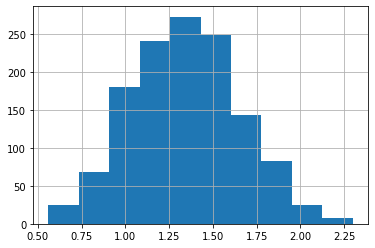

In [ ]:
df['averageprice'].hist()

In [ ]:
from scipy.stats import trim_mean # усеченное среднее арифметическое, концы в воду

1.3450770547945208

In [ ]:
df['averageprice'].median()

1.3450000000000002

In [ ]:
print(df['averageprice'].mode())
print(df['averageprice'].value_counts().head(3))# проверка правильности моды, сошлось, 2 числа встречаются чаще всего

0    1.36
1    1.43
dtype: float64
1.36    25
1.43    25
1.41    22
Name: averageprice, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


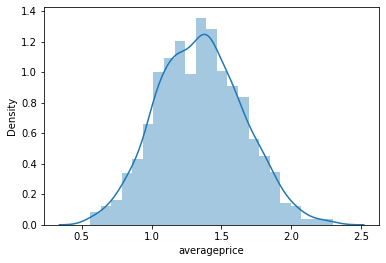

In [ ]:
import seaborn as sns
sns.distplot(df['averageprice'])

***Меры вариабельности признака***

In [ ]:
df['averageprice'].max() - df['averageprice'].min() # размах(диапазон)

1.7399999999999998

In [ ]:
df['averageprice'].var() # дисперсия

0.09354895657562344

In [ ]:
df['averageprice'].mean()  # среднее значение

1.347530864197531

In [ ]:
df['averageprice'].std() # стандартное отклнение(отклонение от среднего)

0.3058577391135026

In [ ]:
from scipy.stats import variation   # коэффициент вариации
variation(df['averageprice'].dropna())

0.22688884076385007

In [ ]:
from scipy.stats import trim_mean
trim_mean(df['averageprice'].dropna(),0.05) # обрубаем выбросы по 2.5% с каждой стороны

1.3450770547945208

In [ ]:
# Примеры квантилей всяких
print(f'Медиана {df["averageprice"].quantile(0.5)}') # Больше 50% выборки
print(f'Нижний квартиль {df["averageprice"].quantile(0.25)}') # Меньше 25% выборки
print(f'Верхний квартиль {df["averageprice"].quantile(0.75)}') # Больше 75% выборки
# Децили - квантили кратные 10%
print(f'Первый дециль {df["averageprice"].quantile(0.1)}') # Меньше 10% выборки
print(f'Девятый дециль {df["averageprice"].quantile(0.9)}') # Больше 10% выборки
# Процентили - квантили, кратные 1%
print(f'Пятый процентиль {df["averageprice"].quantile(0.05)}') # Меньше 5% выборки
print(f'Девяносто пятый процентиль {df["averageprice"].quantile(0.95)}') # Больше 95% выборки

Медиана 1.3450000000000002
Нижний квартиль 1.13
Верхний квартиль 1.56
Первый дециль 0.97
Девятый дециль 1.75
Пятый процентиль 0.86
Девяносто пятый процентиль 1.86


***детектор аномалий:***

In [ ]:
iqr = df["averageprice"].quantile(0.75) - df["averageprice"].quantile(0.25)
iqr

0.43000000000000016

In [ ]:
df["averageprice"].quantile(0.25)-iqr*1.5 #границы тройного межквартильного интервала(нижняя), все,что ниже - выброс

0.48499999999999965

In [ ]:
df["averageprice"].quantile(0.75)+iqr*1.5 #границы тройного межквартильного интервала(верхняя), все,что выше - выброс

2.205

**Задание 4** Постройте гистограмму распределения для averageprice для всего датасета, оцените форму этого распределения, рассчитайте коэффициенты эксцесса и асимметрии. Постройте также диаграмму «Ящик с усами» и скрипичную диаграмму для обычной стоимости авокадо и стоимости авокадо с меткой «натуральный». Проведите аналогичный анализ для Бостона.


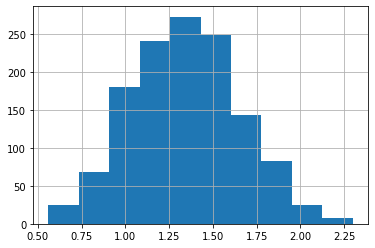

In [ ]:
df['averageprice'].hist() #гистограмма распределения

In [ ]:
# Коэффициент ассиметрии +
skew(df['averageprice'])

0.13553501093453496

In [ ]:
# Простейшим критерием симметрии является равенство средней, моды и медианы
#print(df['averageprice'].mean())
#print(df['averageprice'].mode())
#print(df['averageprice'].median())
# довольно симметричненько, но можно было и лучше
np.sum((df['averageprice'].mean()+df['averageprice'].mode()+df['averageprice'].median())/3)/2 # вот это наверно реальный коэффициент ассиметрии, с учетом того,
                                                                                              # что моды 2 штуки (т.е. 2 равных пиковых значения), а при расчете
                                                                                              # с помощью skew учитывается только один, наверно)

1.3625102880658435

In [ ]:
# Коэффициент эксцесса близок к 0
kurtosis(df['averageprice'])

-0.2075551178154389

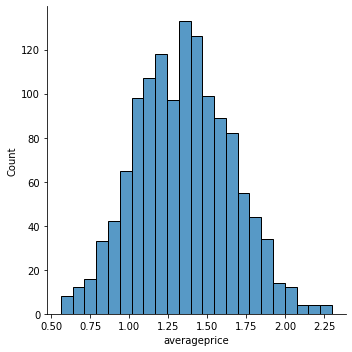

In [ ]:
import seaborn as sns
sns.displot(df['averageprice'])

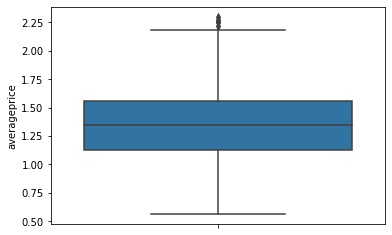

In [ ]:
import seaborn as sns
sns.boxplot(data=df, y='averageprice') # «Ящик с усами» для обычной стоимости авокадо

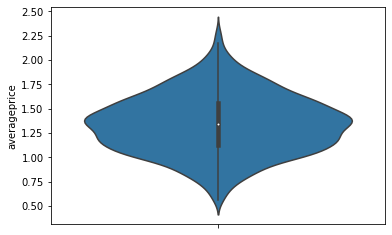

In [ ]:
sns.violinplot(data=df, y='averageprice') # скрипичная диаграмма для обычной стоимости авокадо

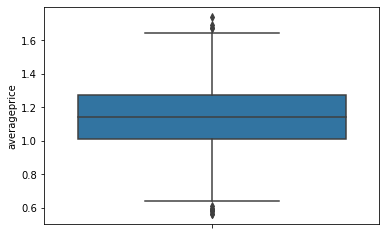

In [ ]:
df1 = df[df['type'] == 'conventional']['averageprice'] # «Ящик с усами» для стоимости авокадо с меткой «натуральный»
sns.boxplot(data=df, y=df1)

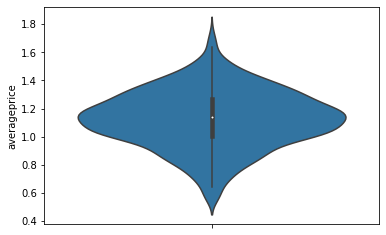

In [ ]:
sns.violinplot(data=df, y=df1)  # скрипичная диаграмма для стоимости авокадо с меткой «натуральный»

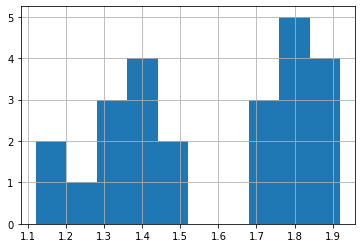

In [ ]:
df[df.region == 'Boston'].averageprice.hist()

In [ ]:
skew(df[df.region == 'Boston'].averageprice)

-0.20085738442684087

In [ ]:
kurtosis(df[df.region == 'Boston'].averageprice)

-1.4953229099280285

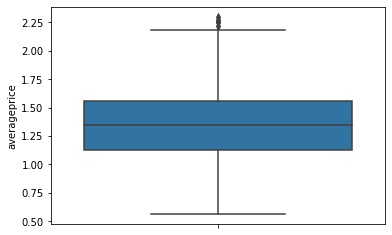

In [ ]:
i = df[df.region == 'Boston']['averageprice'] # «Ящик с усами» для стоимости авокадо в Бостоне
import seaborn as sns
sns.boxplot(data=df, y='averageprice')

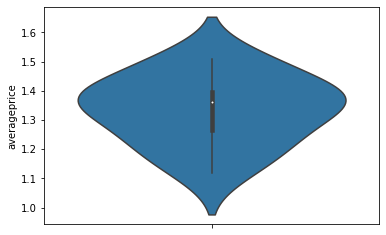

In [ ]:
sns.violinplot(data=df, y=i) # скрипичная диаграмма для стоимости авокадо в Бостоне

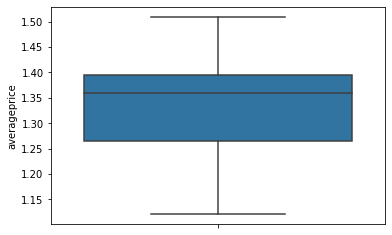

In [ ]:
j = df[(df.region == 'Boston') & (df['type'] == 'conventional')]['averageprice'] # «Ящик с усами» для стоимости авокадо с меткой «натуральный» в Бостоне
import seaborn as sns
sns.boxplot(data=df, y=j)

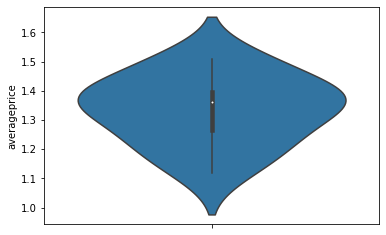

In [ ]:
sns.violinplot(data=df, y=j) # скрипичная диаграмма для стоимости авокадо с меткой «натуральный» в Бостоне

**Задание 5** * Рассчитайте z-оценку для средней цены «натурального» авокадо в Бостоне 2018-03-25 относительно среза по Бостону. Переведите полученную z-оценку в стоимость авокадо, но уже для Чикаго.   


In [ ]:
df.columns

Index(['date', 'region', 'type', 'averageprice', 'total_bags', 'small_bags',
       'large_bags', 'xlarge_bags'],
      dtype='object')

In [ ]:
boston_m = df[(df.region == 'Boston') & (df['type'] == 'conventional') & (df['date'] == '2018-03-25')]['averageprice'].mean()
boston = df[df.region == 'Boston']['averageprice'].mean()/df[df.region == 'Boston']['averageprice'].std()
print(df[df.region == 'Boston']['averageprice'].mean())
print(df[df.region == 'Boston']['averageprice'].std())
print(boston_m)
print(boston)
Z_boston = (boston_m - df[df.region == 'Boston']['averageprice'].mean())/df[df.region == 'Boston']['averageprice'].std()
print(f'Z-оценка по Бостону: {Z_boston}')
# если я правильно понял, то z-оценка меньше 1 находится в пределах стандартного отклонения, т.е. z-оценка будет на расстоянии
# 0.26(std)*0.7(z-оценка) = 0.182 от среднего значения, т.е. значение находится в пределах 68.27% выборки, которые являются типичными
# слева от среднего значения

NameError: ignored

In [ ]:
m = df[df.region == 'Chicago']['averageprice'].mean()
s = df[df.region == 'Chicago']['averageprice'].std()
(boston_m - m)/s

-0.8579914483355531

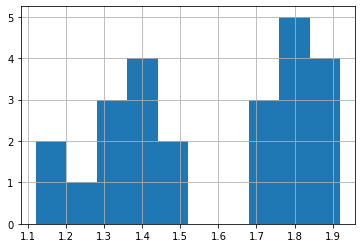

In [ ]:
df[df.region == 'Boston']['averageprice'].hist()

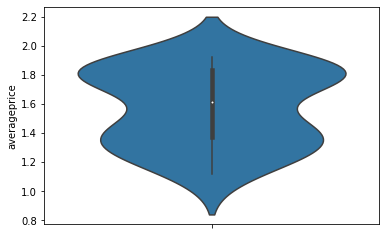

In [ ]:
j = df[df.region == 'Boston']['averageprice']
import seaborn as sns
sns.violinplot(data=df, y=j)
# две моды, поэтому гитара поручилась

In [ ]:
i = df[(df.region == 'Boston') & (df.date =='2018-03-25') & (df['type'] == 'conventional')].averageprice.mean()
(i - df[df.region == 'Boston'].averageprice.mean()) / df[df.region == 'Boston'].averageprice.std()

-0.707661330561785

6. ** Используйте известные вам статистические тесты, чтобы оценить соответствует ли закону нормального распределения средняя стоимость авокадо в Бостоне за указанный период.


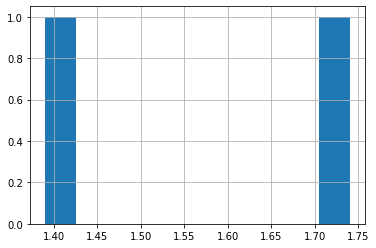

In [ ]:
Boston_st_price = df[(df.region == 'Boston') & (df['date'] == '2018-03-25')]
Boston_st_price.averageprice.hist()

In [ ]:
Boston_st_price.shape

(2, 8)

In [ ]:
# Коэффициент ассиметрии +
skew(Boston_st_price.averageprice) # график симметричен

0.0

In [ ]:
# Коэффициент эксцесса близок к 0
kurtosis(Boston_st_price.averageprice) # имеет минимально возможное значение эксцесса

-2.0

In [ ]:
Boston_st_price.averageprice.mean()

1.565